In [5]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import nltk

# Loading the dataset

In [6]:
revs_og = pd.read_csv('kaggle/dataset.csv')
revs_og.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [7]:
revs_og.shape

(6417106, 5)

In [8]:
revs_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


# 1. Data Cleaning

**Null Value Checking**

In [9]:
revs_og.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [10]:
revs = revs_og[['app_id', 'app_name', 'review_score','review_text']]

In [11]:
revs.isnull().sum()

app_id               0
app_name        183234
review_score         0
review_text       7305
dtype: int64

In [12]:
revs.dropna(inplace = True)

C:\Users\Rei\AppData\Local\Temp\ipykernel_25800\1646697425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revs.dropna(inplace = True)


In [13]:
revs.head()

,app_id,app_name,review_score,review_text
0,10,Counter-Strike,1,Ruined my life.
1,10,Counter-Strike,1,This will be more of a ''my experience with th...
2,10,Counter-Strike,1,This game saved my virginity.
3,10,Counter-Strike,1,• Do you like original games? • Do you like ga...
4,10,Counter-Strike,1,"Easy to learn, hard to master."


In [14]:
revs['review_score'].unique()

array([ 1, -1], dtype=int64)

In [15]:
revs.shape

(6226728, 4)

In [16]:
new_df = revs.sample(n = 50000)

In [17]:
new_df.shape

(50000, 4)

In [18]:
new_df.isnull().sum()

app_id          0
app_name        0
review_score    0
review_text     0
dtype: int64

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 6304128 to 1280842
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        50000 non-null  int64 
 1   app_name      50000 non-null  object
 2   review_score  50000 non-null  int64 
 3   review_text   50000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [20]:
new_df.reset_index(drop = True, inplace = True)

In [21]:
new_df.head()

,app_id,app_name,review_score,review_text
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P..."
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...


**Checking if there is any duplicated row**

In [22]:
# Print the duplicated
# new_df[new_df.duplicated()]
new_df.duplicated().sum()

7279

**Dropping the duplicated rows**

In [23]:
new_df.drop_duplicates(inplace=True)

In [24]:
new_df.duplicated().sum()

0

In [25]:
new_df.shape

(42721, 4)

In [26]:
new_df.rename(columns={'review_score':'target','review_text':'text'},inplace=True)

In [27]:
new_df.head()

,app_id,app_name,target,text
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P..."
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...


# 2. EDA

In [28]:
new_df['target'].value_counts()

target
 1    35128
-1     7593
Name: count, dtype: int64

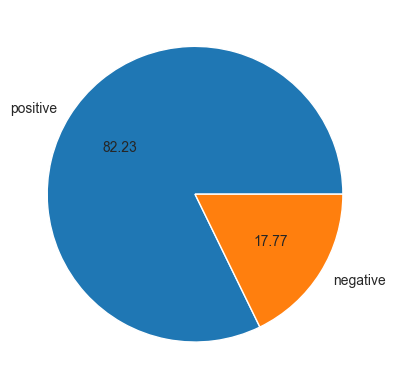

In [29]:
plt.pie(new_df['target'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

> Data is imbalanced

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
new_df['char_num'] = new_df['text'].apply(len)

In [32]:
new_df.head()

,app_id,app_name,target,text,char_num
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P...",69
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...,68
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...,1285
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out,40
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...,1104


In [33]:
#word nums
new_df['word_num'] = new_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
new_df.head()

,app_id,app_name,target,text,char_num,word_num
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P...",69,18
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...,68,19
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...,1285,263
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out,40,8
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...,1104,219


In [34]:
#num of sentences
new_df['sent_num'] = new_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
new_df.head()

,app_id,app_name,target,text,char_num,word_num,sent_num
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P...",69,18,1
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...,68,19,2
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...,1285,263,14
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out,40,8,1
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...,1104,219,5


In [35]:
new_df[['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,42721.000000,42721.000000,42721.000000
mean,355.760750,74.719950,4.291098
std,641.808144,132.886861,7.356603
min,1.000000,0.000000,0.000000
25%,56.000000,13.000000,1.000000
50%,143.000000,31.000000,2.000000
75%,373.000000,79.000000,5.000000
max,7999.000000,2186.000000,615.000000


In [36]:
#neg. reviews description
new_df[new_df['target'] == -1][['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,7593.000000,7593.000000,7593.000000
mean,464.848413,97.761623,5.279073
std,770.077169,160.012576,8.264956
min,1.000000,0.000000,0.000000
25%,74.000000,16.000000,1.000000
50%,201.000000,43.000000,3.000000
75%,524.000000,111.000000,6.000000
max,7983.000000,1795.000000,260.000000


In [37]:
#pos. reviews description
new_df[new_df['target'] == 1][['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,35128.000000,35128.000000,35128.000000
mean,332.181194,69.739439,4.077545
std,607.996461,125.708693,7.127250
min,1.000000,0.000000,0.000000
25%,54.000000,12.000000,1.000000
50%,133.000000,29.000000,2.000000
75%,345.250000,73.000000,4.000000
max,7999.000000,2186.000000,615.000000


In [38]:
import seaborn as sns

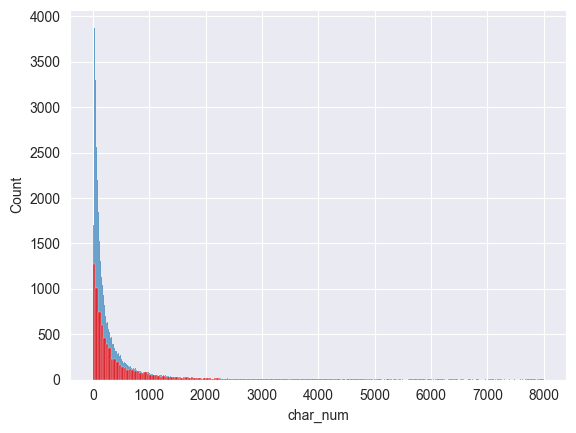

In [39]:
sns.histplot(new_df[new_df['target'] == 1]['char_num'])
sns.histplot(new_df[new_df['target'] == -1]['char_num'],color='red')

plt.show()

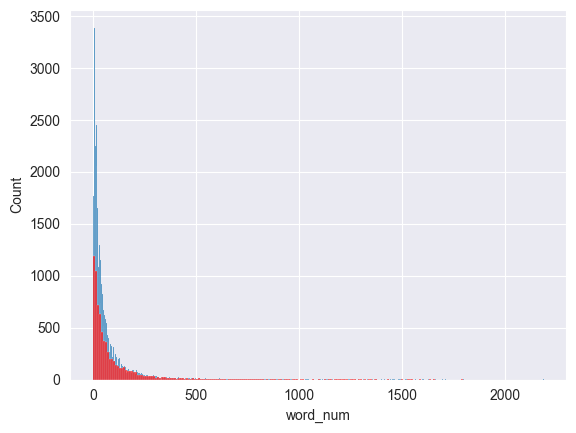

In [40]:
sns.histplot(new_df[new_df['target'] == 1]['word_num'])
sns.histplot(new_df[new_df['target'] == -1]['word_num'],color='red')

plt.show()

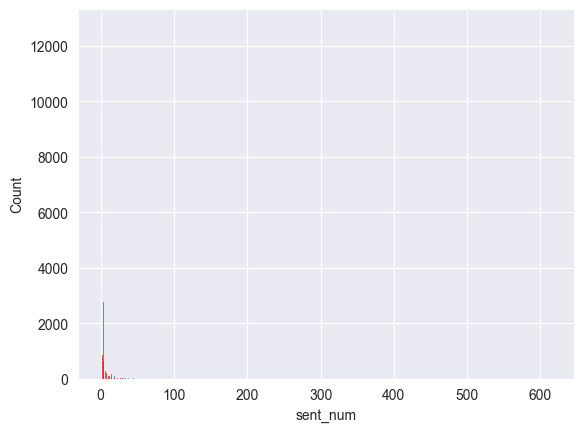

In [41]:
sns.histplot(new_df[new_df['target'] == 1]['sent_num'])
sns.histplot(new_df[new_df['target'] == -1]['sent_num'],color='red')

plt.show()

In [42]:
#2D plots with the, using the target value as the X-axis, while the rest of the DF as the Y-axis
# sns.pairplot(new_df,hue='target')
# plt.show()

In [43]:
# TODO Doesn't work(?) -> convert a String into a Float for whathever reason
# sns.heatmap(new_df.corr(),annot=True)
# plt.show()

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [44]:
new_df.reset_index(drop = True, inplace = True)

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
#Self-contained function for pandarallel to work
import nltk
nltk.download('stopwords')

def convert_text(text):
    #Importing libraries to work with pandarallel
    import nltk
    from nltk.corpus import stopwords
    import string
    from nltk.stem.porter import PorterStemmer

    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    y =[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    for i in x:
        y.append(ps.stem(i))
    return ' '.join(y)

In [48]:
new_df['text'][8]

"I work a the airport, so I wanted to try this simulator. Although its not exactly how an airport functions, it does have the basics. However, most of the time, when working there, the problems are not what happens outside but inside. The game does not show any people and thre doesn't seem to be much of point playing beyond the 5th section. Once you unlocked the bus and the ranp and the plow, you're pretty much done with the game. You've seen it all. I only played for a few hours, and it felt nothing like the airport. So it is a poor simulator."

In [49]:
from pandarallel import pandarallel
pandarallel.initialize()
new_df['converted_text']=new_df['text'].parallel_apply(convert_text)
# new_df['converted_text']=new_df['text'].apply(convert_text)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [50]:
new_df.head()

,app_id,app_name,target,text,char_num,word_num,sent_num,converted_text
0,8600,RACE 07,1,"Great racing sim game from SimBin, but... no P...",69,18,1,great race sim game simbin ... pc wheel game joy
1,33930,Arma 2: Operation Arrowhead,1,D... D... D... DayZ! The mod that successfully...,68,19,2,... ... ... dayz mod success add z day
2,236690,Blood Bowl 2,1,Blood Bowl 2 is amazing turn-based strategy in...,1285,263,14,blood bowl 2 amaz turn-bas strategi inspir boa...
3,242920,Banished,1,Build a small village with your ♥♥♥♥ out,40,8,1,build small villag ♥♥♥♥
4,258520,The Vanishing of Ethan Carter,1,So this game finally made me write my short fi...,1104,219,5,game final made write short first review want ...


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color = 'white')

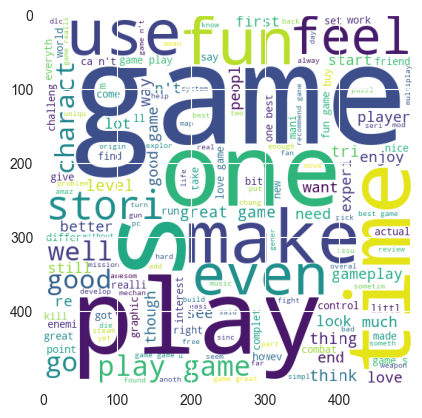

In [52]:
pos_wc = wc.generate(new_df[new_df['target']==1]['converted_text'].str.cat(sep=" "))
plt.imshow(pos_wc)
plt.show()

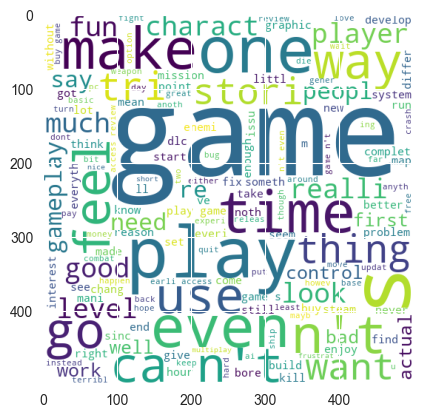

In [53]:
neg_wc = wc.generate(new_df[new_df['target']==-1]['converted_text'].str.cat(sep=" "))
plt.imshow(neg_wc)
plt.show()

# 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features=5000)

In [55]:
X = cv.fit_transform(new_df['converted_text']).toarray()

In [56]:
X.shape

(42721, 3000)

In [57]:
y = new_df['target'].values

In [58]:
#y

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [60]:
X_train.shape

(34176, 3000)

In [61]:
y_train.shape

(34176,)

In [62]:
X_test.shape

(8545, 3000)

In [63]:
y_test.shape

(8545,)

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score


In [153]:
# gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
clf_tree = tree.DecisionTreeClassifier()
clf_sgd = SGDClassifier()

In [79]:
#Training the 5 defined models

# gnb.fit(X_train,y_train)
# print("Gaussian Naive Bayes fitted.")
mnb.fit(X_train,y_train)
print("Multinomial Naive Bayes fitted.")
bnb.fit(X_train,y_train)
print("Bernoulli Naive Bayes fitted.")
clf_tree.fit(X_train,y_train)
print("Decisions tree fitted.")
clf_sgd.fit(X_train,y_train)
print("Stochastic Gradient Descent fitted.")

Gaussian Naive Bayes fitted.
Multinomial Naive Bayes fitted.
Bernoulli Naive Bayes fitted.
Decisions tree fitted.
Stochastic Gradient Descent fitted.


In [80]:
stats = {}
def add_stats(algorithm, test, pred):
    stats[algorithm] = {
                        "F1 %" : round(f1_score(test,pred)*100,2),
                        "Precision %" : round(precision_score(test,pred)*100,2),
                        "Recall %" : round(recall_score(test,pred)*100,2),
                        "Accuracy %" : round(accuracy_score(test, pred)*100,2),
                        # "Confusion Matrix" : confusion_matrix(test,pred)
                        }

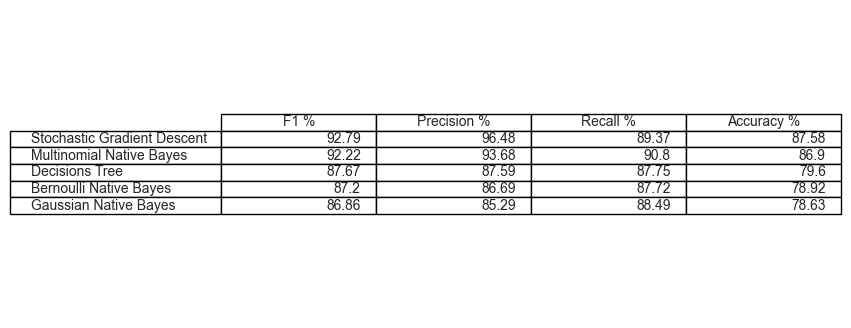

In [81]:
#Predictions and adding stats to the dictionary.
# y_pred1 = gnb.predict(X_test)
# add_stats("Gaussian Native Bayes", y_pred1, y_test)

y_pred2 = mnb.predict(X_test)
add_stats("Multinomial Native Bayes", y_pred2, y_test)

y_pred3 = bnb.predict(X_test)
add_stats("Bernoulli Native Bayes", y_pred3, y_test)

y_pred4 = clf_tree.predict(X_test)
add_stats("Decisions Tree", y_pred4, y_test)

y_pred5 = clf_sgd.predict(X_test)
add_stats("Stochastic Gradient Descent", y_pred5, y_test)

#Building table
df_stats = pd.DataFrame.from_dict(stats, orient='index')
df_stats = df_stats.sort_values(by="F1 %", ascending=False)
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Hide axes' labels
ax.set_frame_on(False)
ax.table(cellText=df_stats.values, colLabels=df_stats.columns, rowLabels=df_stats.index, loc='center')

plt.show()

In [94]:
def checker(text, sa_algorithm):
    test = convert_text(text)
    X = cv.transform([test])
    return sa_algorithm.predict(X)[0]

In [93]:
print(checker('game is a waste of time', mnb))
print(checker('I really loved this game', mnb))

-1
1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
#benchmark the algorithms
reviews = [
    ["Imagine waiting for an hour and ten minutes and still not being able to get into a private game.",-1],
    ["I have been playing this game fairly consistently for the past 8 or so years. I also lead an in-game Fleet (Guild) that has had a constant player base that has grown and shrunk over time with sometimes hundreds of people. In other words, I truly love this game and almost always have enjoyed playing it. Which makes what I'm about to say very hard.Over these years the game has steadily become one of the most greediest, dirtiest cash grabs in the current Free-to-Play MMO market. It takes literal months to grind (and I mean GRIND) for a free, premium ship. Even other free ships, like the summer/winter event ones, still require weeks of grinding - and it NEVER changes. They don't change these events, so every year it's the same activities. which becomes extremely dull extremely fast.Not to mention EVERYTHING else in the game requires a purchase. Uniforms, lockbox keys, bridge officers, playable factions, inventory slots, bank slots, ship slots, duty officers, shuttles, equipment upgrades, etc. While some fans may attack me and say that not ALL of these items are only attainable through real money purchases, it is MUCH easier to buy them than to grind for them.Another in-game currency, Dilithium, has had a very small cap that has never changed for countless years. This currency allows you to upgrade your gear, support your Fleet, buy special equipment you unlock through Reputations (which, of course, require a little bit of grinding, but not nearly as bad as the previously mentioned gripes) and other useful items. The cap is insultingly low, and once again, some fans may say 'well, you can refine a little extra from your Fleet mine!' or 'If you're a lifetime member, you can refine an extra 1,000 every few days'. Of course, lifetime subscriptions cost $200-$300, assuming they're on sale. Obviously a small price to pay for a little extra dilithium that can only be initiated through a certain mission on a certain planet.This is only scratching the surface of this game's issues. A lot of the older missions have loads of bugs and are simply outdated (think Nimbus), some of the newer ones have some too, the engine has been out of date for years and they show no sign of upgrading it, and there's just so many bugs sometimes. I can recall when expansions would drop and certain missions or activities would literally cause your game to crash. I understand some of these times bugs will happen, but Cryptic never seems to truly test their new content.I am truly saddened and sickened by how awful the monetisation methods have become in this game. Like I said, I still do love this game, but I don't recommend new players to try it right now. I PRAY that they will eventually realize the insanity behind their practices and actually put some love and effort into this game, but until they do, you're better off playing older Star Trek games like Armada. ",-1],
    ["The demo ran flawlessly on Linux via Proton. After release, Denuvo absolutely destroys performance. Micro-stutters abound, the death of a game in this genre. On windows, there are fewer stutters, so it's a bit more playable, but they are still present at times. This game looks like a masterpiece, shame it can't be played normally. ",-1],
    ["I COULDNT GO DOWN THE SLIDE! THIS GAME SUCKED DONKEY BALLS!",-1],
    ["I should have refunded this a bit sooner. ",-1],
    ["It's a good game ruined by jank and the boring loot mechanics. Also no music??. ",-1],
    ["they like turned a sick ass tactics mmo into a crappy mobile game, it's insane",-1],
    ["Server issues aside, Game is solid 8/10",1],
    ["To sum up this game in a way only players will understand: This game has a unique ability to make you think about your next play through while you're still playing your current one.",1],
    ["Don't play if you enjoy remembering to eat or drink, remembering there is an outside or having free time. Other than that amazing game that can keep you entertained for hours on end",1],
    ["Don't spend real money on this. You can easily get to rank 5 by playing nothing but story missions, get some fanservice, fly the Enterprise-E around, do all the things you really want to do as a Star Trek fan, all within a few dozen hours. If, at the end of that journey, you find that you enjoy MMORPGS, then knock yourself out. But if you're a non-MMO-player like me who just really loves the Star Trek franchise, free-to-play is the way to go. ",1],
    ["Phenomenal. The combat is excellent and the level design is on point. This is a soulsborne where the developers did their homework. ",1],
    ["The game is filled with bugs but I'm still recommending it because I got to witness my friends getting scared to death which was a really pleasant experience.",1],
    ["some ♥♥♥♥ called me the n word so I nuked the whole map. i love this game",1],
    ["this is cheaper then drugs and more addictive but with somehow the same damaging potential to your social life but with non of the long lasting effects and with better story telling highly recommend",1],
    ["You must run to collect more pesos",1]
    ]

sent_analysis_algs = [
    [mnb, 'MultinomialNB'],
    # [gnb, 'GaussianNB'],
    [bnb, 'BernoulliNB'],
    [clf_tree, 'tree'],
    [clf_sgd, 'SGD']]

benchmark = {}
for alg, name in sent_analysis_algs:
    benchmark[name] = [0, []]
    for rev, expected_res in reviews:
        res = checker(rev,alg)
        if res == expected_res:
            benchmark[name][0] +=1
        else:
            benchmark[name][1].append(rev)
benchmark

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_d

{'MultinomialNB': [14,
  ["It's a good game ruined by jank and the boring loot mechanics. Also no music??. ",
   "they like turned a sick ass tactics mmo into a crappy mobile game, it's insane"]],
 'BernoulliNB': [10,
  ['Imagine waiting for an hour and ten minutes and still not being able to get into a private game.',
   'I COULDNT GO DOWN THE SLIDE! THIS GAME SUCKED DONKEY BALLS!',
   'I should have refunded this a bit sooner. ',
   "It's a good game ruined by jank and the boring loot mechanics. Also no music??. ",
   "they like turned a sick ass tactics mmo into a crappy mobile game, it's insane",
   "Don't spend real money on this. You can easily get to rank 5 by playing nothing but story missions, get some fanservice, fly the Enterprise-E around, do all the things you really want to do as a Star Trek fan, all within a few dozen hours. If, at the end of that journey, you find that you enjoy MMORPGS, then knock yourself out. But if you're a non-MMO-player like me who just really lov

# 5.Saving the models


In [84]:
from joblib import dump
dump(mnb, 'MultinomialNB.joblib')
# dump(gnb, 'GaussianNB.joblib')
dump(bnb, 'BernoulliNB.joblib')
dump(clf_tree, 'tree.joblib')
dump(clf_sgd, 'SGD.joblib')

['SGD.joblib']

# 6.Loading the model

In [ ]:
from joblib import load
mnb = load('MultinomialNB.joblib')
# gnb = load('GaussianNB.joblib')
bnb = load('BernoulliNB.joblib')
clf_tree = load('tree.joblib')
clf_sgd = load('SGD.joblib')

# 7.Tests

In [216]:
all_ids = set(new_df['app_id'])
all_ids

{491520,
 32770,
 360450,
 65540,
 262150,
 10,
 491530,
 393230,
 426000,
 20,
 65560,
 393240,
 426010,
 30,
 40,
 262190,
 50,
 426040,
 60,
 327740,
 360510,
 491580,
 65600,
 262210,
 70,
 360520,
 65610,
 458830,
 80,
 360530,
 524380,
 98400,
 262240,
 360550,
 229480,
 262260,
 130,
 491650,
 32900,
 360580,
 393350,
 557190,
 262280,
 458890,
 360590,
 229520,
 360600,
 393380,
 458920,
 360620,
 327860,
 426170,
 360640,
 65730,
 98500,
 327880,
 491720,
 360650,
 393420,
 229580,
 65740,
 458960,
 327890,
 393430,
 458970,
 220,
 229600,
 327910,
 524520,
 240,
 327920,
 65780,
 393460,
 262390,
 327930,
 524540,
 65790,
 459010,
 327940,
 65800,
 262410,
 459020,
 491790,
 327950,
 524560,
 360720,
 280,
 327960,
 360730,
 360740,
 98600,
 300,
 327980,
 262450,
 426290,
 491830,
 393530,
 320,
 262470,
 33100,
 295250,
 459090,
 340,
 33110,
 262490,
 426330,
 360,
 33130,
 524650,
 262510,
 524660,
 459130,
 380,
 328070,
 360840,
 65930,
 393610,
 400,
 328080,
 524690,


In [217]:
keys = {'app_id', 'app_name'}
all_games = {key: new_df[key] for key in keys}

In [218]:
text_extracted = new_df.groupby('app_id')['text'].apply(list)

In [219]:
text_extracted.describe()

count                       7973
unique                      7254
top       [ Early Access Review]
freq                         282
Name: text, dtype: object

# 8.Load game categories

In [ ]:
#loading game categories

gameid_tags = pd.read_csv('games_tags.csv')
gameid_tags.info()

# 9.Rank games based on their sentiment analysis

In [ ]:
#Weight formula: (valoreSentiment x 1,5)(se review_text non null) + 1,3 x review_score + 1,15 x (review_votes)

# 10.Given a steam user, analyze its gaming behaviours

# 11.Take a user and based on its hours spent by playing a certain genre, try to recommend a certain game that fits  its tastes